# CREATE DEEP NEURAL NETWORK

In [17]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop 
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import L2

from os.path import join
from os import listdir
from shutil import copy

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# GLOBAL VARIABLES
preprocessingPath="preprocessingData"
path = "data"
classes = listdir(preprocessingPath)
trainPath = join(path,"train")
valPath = join(path,"val")
train = 0.80 # ;val = 1. - train
np.random.seed(26)


batch_size = 32
epochs = 256
lr = 1e-4
input_shape = (224,224)
channels = (1,)
class_mode = 'categorical'
color_mode = 'grayscale'
num_class = len(classes)

## Mount files to data generators

In [19]:
# ## SEPARATING TO TRAIN AND VALIDATION SETS
# for c in classes:
#     classPath = join(preprocessingPath,c)
#     images = listdir(classPath)
#     np.random.shuffle(images)
#     numImages = len(images)
#     setClassPath = join(trainPath,c)
#     for n,image in enumerate(images):
#         if n == round(numImages*train): 
#             setClassPath = join(valPath,c)
#         imagePath = join(classPath,image)
#         newImagePath = join(setClassPath,image)
#         copy(imagePath, newImagePath)

In [20]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    #  width_shift_range = 0.2,
                                    #  height_shift_range = 0.2, 
                                    #  zoom_range = 0.2,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                     rotation_range = 45,
                                     ).flow_from_directory(directory = trainPath,
                                                                         target_size=input_shape,
                                                                         color_mode=color_mode,
                                                                         class_mode=class_mode,
                                                                         batch_size=batch_size,
                                                                         )

val_generator = ImageDataGenerator(rescale=1./255,).flow_from_directory(directory = valPath,
                                                                         target_size=input_shape,
                                                                         color_mode=color_mode,
                                                                         class_mode=class_mode,
                                                                         batch_size=batch_size,
                                                                         )

Found 738 images belonging to 4 classes.
Found 184 images belonging to 4 classes.


## CREATE MODEL

In [21]:
model = Sequential()
model.add(Input(input_shape+channels))
model.add(Flatten())
model.add(Dense(units=224, activation='relu', kernel_regularizer=L2()))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=2048, activation='relu', kernel_regularizer=L2()))
model.add(Dropout(0.5))
# model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_class, activation='softmax'))



In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_6 (Dense)             (None, 224)               33718496  
                                                                 
 batch_normalization_2 (Batc  (None, 224)              896       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 224)               0         
                                                                 
 dense_7 (Dense)             (None, 2048)              460800    
                                                                 
 dropout_5 (Dropout)         (None, 2048)              0         
                                                      

In [23]:
model.compile(optimizer=Adam(lr), loss='categorical_crossentropy', metrics=['acc'])

In [24]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1,
                              patience=4, min_lr=1e-7)
es = EarlyStopping(monitor='loss', patience=7)

history = model.fit(train_generator, validation_data = val_generator, 
                        epochs = epochs, callbacks=[reduce_lr, es], 
                        verbose = 1)

Epoch 1/256
24/24 [==============================] - 8s 293ms/step - loss: 9.6357 - acc: 0.2805 - val_loss: 9.5080 - val_acc: 0.2446 - lr: 1.0000e-04
Epoch 2/256
24/24 [==============================] - 5s 186ms/step - loss: 8.7503 - acc: 0.3374 - val_loss: 8.5128 - val_acc: 0.2826 - lr: 1.0000e-04
Epoch 3/256
24/24 [==============================] - 4s 186ms/step - loss: 8.0545 - acc: 0.3442 - val_loss: 7.9432 - val_acc: 0.2554 - lr: 1.0000e-04
Epoch 4/256
24/24 [==============================] - 5s 187ms/step - loss: 7.4866 - acc: 0.3482 - val_loss: 7.4501 - val_acc: 0.2283 - lr: 1.0000e-04
Epoch 5/256
24/24 [==============================] - 5s 188ms/step - loss: 7.0443 - acc: 0.3171 - val_loss: 6.8177 - val_acc: 0.3261 - lr: 1.0000e-04
Epoch 6/256
24/24 [==============================] - 5s 189ms/step - loss: 6.6239 - acc: 0.3428 - val_loss: 6.5050 - val_acc: 0.3152 - lr: 1.0000e-04
Epoch 7/256
24/24 [==============================] - 5s 187ms/step - loss: 6.3165 - acc: 0.3482 - va

UnknownError: Graph execution error:

2 root error(s) found.
  (0) UNKNOWN:  FileNotFoundError: [Errno 2] No such file or directory: 'data\\train\\6\\6k--27-_jpg.rf.35404ee9cc6fbd984a3c173a0e71a0af.jpg'
Traceback (most recent call last):

  File "c:\Users\miniconda3\envs\tf\lib\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "c:\Users\miniconda3\envs\tf\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "c:\Users\miniconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1035, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\engine\data_adapter.py", line 903, in wrapped_generator
    for data in generator_fn():

  File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\engine\data_adapter.py", line 1050, in generator_fn
    yield x[i]

  File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\preprocessing\image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\preprocessing\image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\utils\image_utils.py", line 422, in load_img
    with open(path, "rb") as f:

FileNotFoundError: [Errno 2] No such file or directory: 'data\\train\\6\\6k--27-_jpg.rf.35404ee9cc6fbd984a3c173a0e71a0af.jpg'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
	 [[categorical_crossentropy/softmax_cross_entropy_with_logits/Shape_2/_6]]
  (1) UNKNOWN:  FileNotFoundError: [Errno 2] No such file or directory: 'data\\train\\6\\6k--27-_jpg.rf.35404ee9cc6fbd984a3c173a0e71a0af.jpg'
Traceback (most recent call last):

  File "c:\Users\miniconda3\envs\tf\lib\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "c:\Users\miniconda3\envs\tf\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "c:\Users\miniconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1035, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\engine\data_adapter.py", line 903, in wrapped_generator
    for data in generator_fn():

  File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\engine\data_adapter.py", line 1050, in generator_fn
    yield x[i]

  File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\preprocessing\image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\preprocessing\image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "c:\Users\miniconda3\envs\tf\lib\site-packages\keras\utils\image_utils.py", line 422, in load_img
    with open(path, "rb") as f:

FileNotFoundError: [Errno 2] No such file or directory: 'data\\train\\6\\6k--27-_jpg.rf.35404ee9cc6fbd984a3c173a0e71a0af.jpg'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_16414]

## PLOT RESULTS

In [ ]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

best_epoch = np.argmax(np.array(val_acc))

print("Best Epoch: ", best_epoch)
print("Final Train Loss: {:.4f}".format(train_loss[best_epoch]))
print("Final Validation Loss: {:.4f}".format(val_loss[best_epoch]))
print("Final Train Accuracy: {:.4f}".format(train_acc[best_epoch]))
print("Final Test Accuracy: {:.4f}".format(val_acc[best_epoch]))

Best Epoch:  9
Final Train Loss: 4.6211
Final Validation Loss: 4.5831
Final Train Accuracy: 0.4026
Final Test Accuracy: 0.4333


In [ ]:
import warnings
warnings.filterwarnings("ignore")

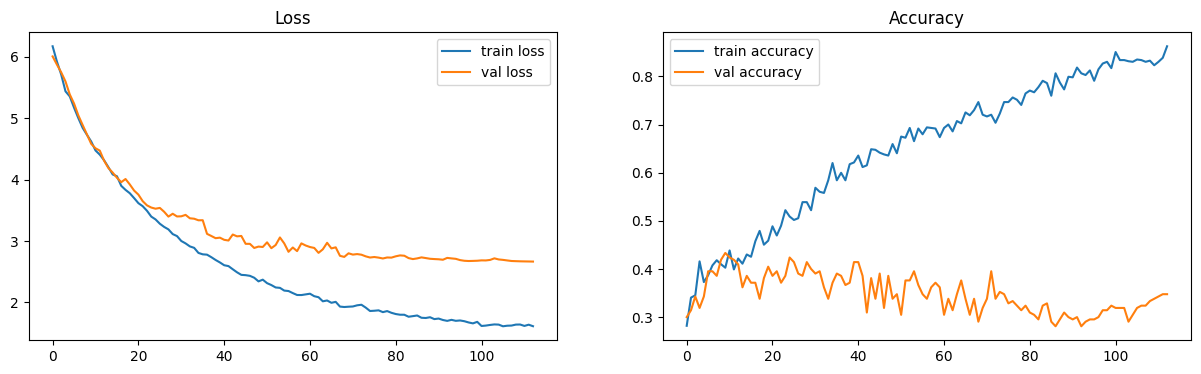

In [ ]:

fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.lineplot(train_loss , ax=ax[0], label='train loss')
sns.lineplot(val_loss, ax=ax[0], label='val loss')
# ax[0].legend(labels=['train loss','validation loss'],loc="upper right")
ax[0].set_title('Loss')

sns.lineplot(train_acc, ax=ax[1], label='train accuracy')
sns.lineplot(val_acc, ax=ax[1], label='val accuracy')
# ax[1].legend(labels=['train acc','validation acc'],loc="upper right")
ax[1].set_title('Accuracy')

plt.show()
